# Top Global Tech Companies Analysis

# Importing libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [148]:
df=pd.read_csv('Top 1000 technology companies.csv')

In [149]:
df.head(10)

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
5,6,"Samsung Electronics Co., Ltd.",$392.38 B,005930,South Korea,Technology,Consumer Electronics
6,7,ASML Holding N.V.,$297.10 B,ASML,Netherlands,Technology,Semiconductor Equipment & Materials
7,8,Oracle Corporation,$282.01 B,ORCL,United States,Technology,Software—Infrastructure
8,9,Adobe Inc.,$260.23 B,ADBE,United States,Technology,Software—Infrastructure
9,10,"salesforce.com, inc.",$243.78 B,CRM,United States,Technology,Software—Application


In [150]:
df.shape

(1000, 7)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [152]:
df.describe()

,Ranking
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [153]:
df.isnull().sum()

Ranking       0
Company       0
Market Cap    0
Stock         0
Country       0
Sector        0
Industry      0
dtype: int64

# Cleaning Industry column

In [154]:
# Function to clean the Industry column
def clean_industry(industry):
    # Replace special characters and normalize spaces
    industry = industry.replace('â€”', ' ').replace('â€“', ' ')
    industry = industry.replace('-', ' ')
    industry = industry.strip()  # Remove leading and trailing whitespaces
    return industry

# Apply the cleaning function to the Industry column
df['Industry'] = df['Industry'].apply(clean_industry)

# Display the cleaned DataFrame
print(df[['Stock', 'Country', 'Sector', 'Industry']])

      Stock        Country      Sector                            Industry
0      AAPL  United States  Technology                Consumer Electronics
1      MSFT  United States  Technology             Software—Infrastructure
2      NVDA  United States  Technology                      Semiconductors
3      AVGO  United States  Technology                      Semiconductors
4      2330         Taiwan  Technology                      Semiconductors
..      ...            ...         ...                                 ...
995  603508          China  Technology  Scientific & Technical Instruments
996    9715          Japan  Technology     Information Technology Services
997    9923          China  Technology             Software—Infrastructure
998  300552          China  Technology  Scientific & Technical Instruments
999  688095          China  Technology                Software—Application

[1000 rows x 4 columns]


In [155]:
company1=df['Company'].value_counts(ascending=False)
company1

Apple Inc.                                               1
Wondershare Technology Group Co. Ltd                     1
Amano Corp                                               1
Oxford Instruments plc                                   1
Cellebrite DI Ltd                                        1
                                                        ..
Sharp Corp                                               1
Reply S.p.A.                                             1
Worldline SA                                             1
Brooks Automation, Inc.                                  1
Fujian Foxit Software Development Joint Stock Co.,Ltd    1
Name: Company, Length: 1000, dtype: int64

In [156]:
market_cap1=df['Market Cap'].value_counts(ascending=False)
market_cap1

$1.16 B     9
$1.52 B     9
$1.03 B     7
$1.09 B     7
$1.19 B     6
           ..
$7.95 B     1
$7.86 B     1
$7.77 B     1
$7.75 B     1
$811.5 M    1
Name: Market Cap, Length: 684, dtype: int64

In [157]:
stock1=df['Stock'].value_counts(ascending=False)
stock1

2382      2
2317      2
SPT       2
6770      2
AAPL      1
         ..
6753      1
REY       1
WLN       1
BRKS      1
688095    1
Name: Stock, Length: 996, dtype: int64

In [158]:
country1=df['Country'].value_counts(ascending=False)
country1

United States           317
China                   268
Taiwan                  118
Japan                    91
Germany                  21
United Kingdom           19
Canada                   18
France                   17
Israel                   14
Switzerland              12
Australia                11
Sweden                    9
Hong Kong                 9
Netherlands               7
South Korea               7
Norway                    5
Brazil                    5
Italy                     5
Singapore                 4
Cayman Islands            4
Belgium                   4
Finland                   4
Denmark                   4
Thailand                  3
India                     3
New Zealand               2
Spain                     2
Ireland                   2
United Arab Emirates      2
Turkey                    2
Bermuda                   2
Poland                    2
Austria                   2
Czechia                   1
Luxembourg                1
Kazakhstan          

In [159]:
sector1=df['Sector'].value_counts(ascending=False)
sector1

Technology    1000
Name: Sector, dtype: int64

In [160]:
industry1=df['Industry'].value_counts(ascending=False)
industry1

Software—Application                   198
Semiconductors                         135
Information Technology Services        129
Electronic Components                  122
Software—Infrastructure                104
Semiconductor Equipment & Materials     70
Communication Equipment                 69
Computer Hardware                       60
Scientific & Technical Instruments      49
Consumer Electronics                    34
Solar                                   19
Electronics & Computer Distribution     11
Name: Industry, dtype: int64

# Cleaning Market Cap column

In [161]:
# Function to convert market cap
def convert_market_cap(value):
    value = value.replace('$', '').strip()
    if 'T' in value:
        return float(value.replace(' T', '')) * 1e12  # Convert trillions to numeric
    elif 'B' in value:
        return float(value.replace(' B', '')) * 1e9   # Convert billions to numeric
    elif 'M' in value:
        return float(value.replace(' M', '')) * 1e6   # Convert millions to numeric
    else:
        return float(value)  # Handle if there's a case for other values

# Apply the conversion function
df['Market Cap'] = df['Market Cap'].apply(convert_market_cap)

# Now the Market Cap column should be of float type
print(df)
print(df.dtypes)

     Ranking                                            Company    Market Cap  \
0          1                                         Apple Inc.  2.866000e+12   
1          2                              Microsoft Corporation  2.755000e+12   
2          3                                 Nvidia Corporation  1.186000e+12   
3          4                                      Broadcom Inc.  4.959500e+11   
4          5  Taiwan Semiconductor Manufacturing Company Lim...  4.876400e+11   
..       ...                                                ...           ...   
995      996         Henan Thinker Automatic Equipment Co.,Ltd.  8.254000e+08   
996      997                                  transcosmos, Inc.  8.195000e+08   
997      998                                         Yeahka Ltd  8.193000e+08   
998      999                   Beijing Wanji Technology Co. Ltd  8.161000e+08   
999     1000  Fujian Foxit Software Development Joint Stock ...  8.115000e+08   

      Stock        Country 

In [162]:
df.head(10)

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,2.866000e+12,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,2.755000e+12,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,1.186000e+12,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,4.959500e+11,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,4.876400e+11,2330,Taiwan,Technology,Semiconductors
5,6,"Samsung Electronics Co., Ltd.",3.923800e+11,005930,South Korea,Technology,Consumer Electronics
6,7,ASML Holding N.V.,2.971000e+11,ASML,Netherlands,Technology,Semiconductor Equipment & Materials
7,8,Oracle Corporation,2.820100e+11,ORCL,United States,Technology,Software—Infrastructure
8,9,Adobe Inc.,2.602300e+11,ADBE,United States,Technology,Software—Infrastructure
9,10,"salesforce.com, inc.",2.437800e+11,CRM,United States,Technology,Software—Application


# Data is cleaned, let's do the visualization

# 1. What is count of industries type under Technology Sector?

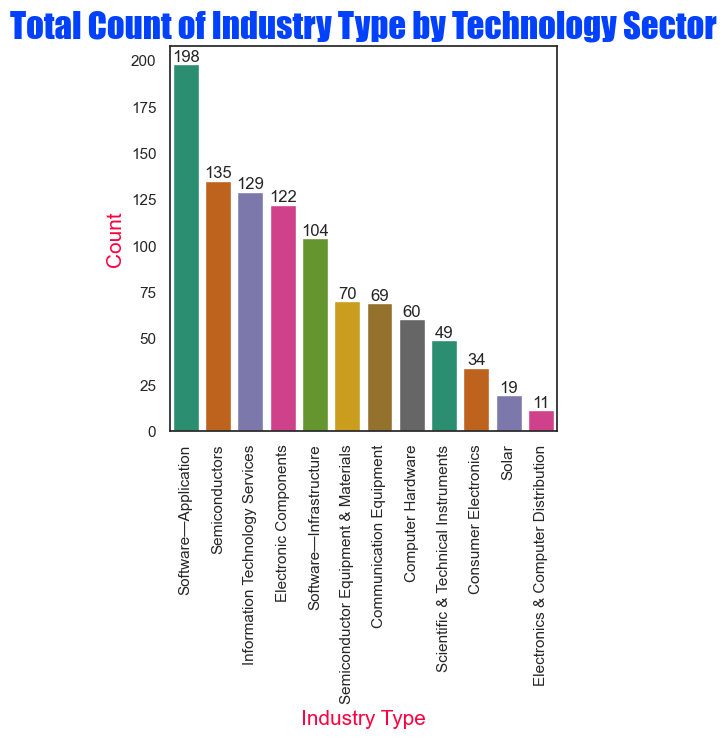

In [163]:
# Count the occurrences of each Industry type and sort it
industry_type_counts = df['Industry'].value_counts()
sorted_industry_type = industry_type_counts.index.tolist()

# Filter for the Technology sector
sector_technology = df[df['Sector'] == 'Technology']

# Count plot for the Technology sector's industries
industry_type = sb.countplot(data=sector_technology, x='Industry', palette='Dark2', order=sorted_industry_type)

# Adding labels to the bars
for bars in industry_type.containers:
    industry_type.bar_label(bars)

sb.set(rc={'figure.figsize': (5, 5)})
sb.set_style('white')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Industry Type', fontdict=font2)  # x-axis label
plt.ylabel('Count', fontdict=font2)  # y-axis label
plt.title('Total Count of Industry Type by Technology Sector', fontdict=font1)
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Insight 1: Software-Application Industry Type has the highest number of counts.

# 2. What is Average Market Capital for each Country?

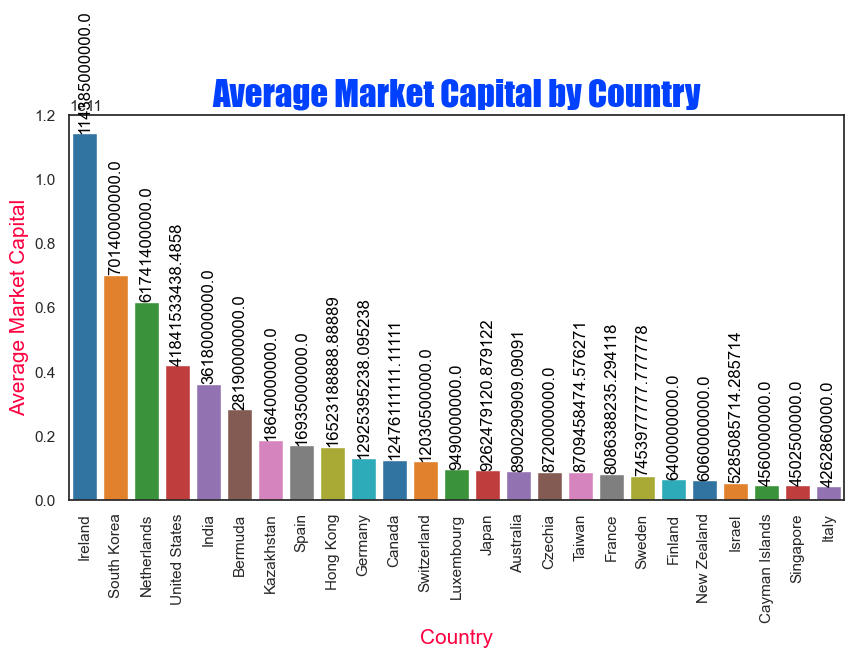

In [170]:
Market_Cap=df.groupby(['Country'], as_index=False)['Market Cap'].mean().sort_values(by='Market Cap',ascending=False). head(25)
sb.barplot(x='Country', y='Market Cap', data=Market_Cap, palette='tab10')
for index, value in enumerate(Market_Cap['Market Cap']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', color='black', rotation=90)
sb.set(rc={'figure.figsize':(10,5)})
sb.set_style('white')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Country', fontdict=font2)  # x-axis label
plt.ylabel('Average Market Capital', fontdict=font2)      #  y-axis label
plt.title('Average Market Capital by Country', fontdict=font1)

plt.xticks(rotation=90)

# Show the plot
plt.show()

### Insight 2: Ireland has highest average market capital as 114385000000.0

# 3. What is Average Market Capital for each Industry?

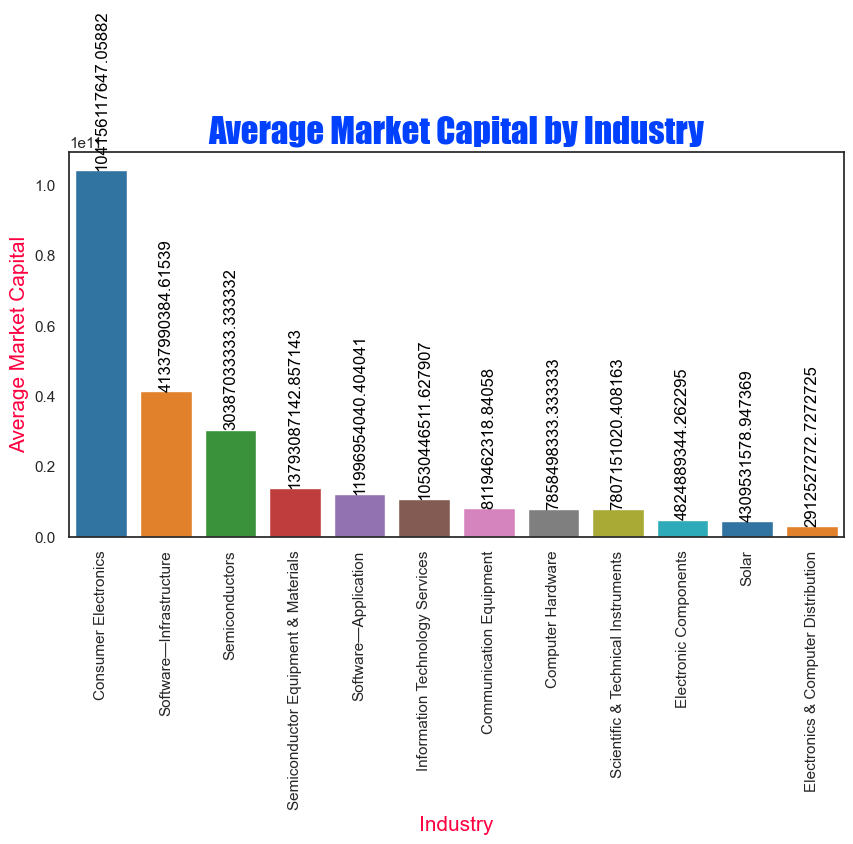

In [165]:
Market_Cap=df.groupby(['Industry'], as_index=False)['Market Cap'].mean().sort_values(by='Market Cap',ascending=False)
sb.barplot(x='Industry', y='Market Cap', data=Market_Cap, palette='tab10')
for index, value in enumerate(Market_Cap['Market Cap']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', color='black', rotation=90)
sb.set(rc={'figure.figsize':(15,5)})
sb.set_style('white')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Industry', fontdict=font2)  # x-axis label
plt.ylabel('Average Market Capital', fontdict=font2)      #  y-axis label
plt.title('Average Market Capital by Industry', fontdict=font1)

plt.xticks(rotation=90)

# Show the plot
plt.show()

### Insight 3: Highest average market capital is for "Consumer Electronics" followed by "Software-Infrastructure" and "Semiconductors" Industry type.

# 4. Which company has the highest market capital?

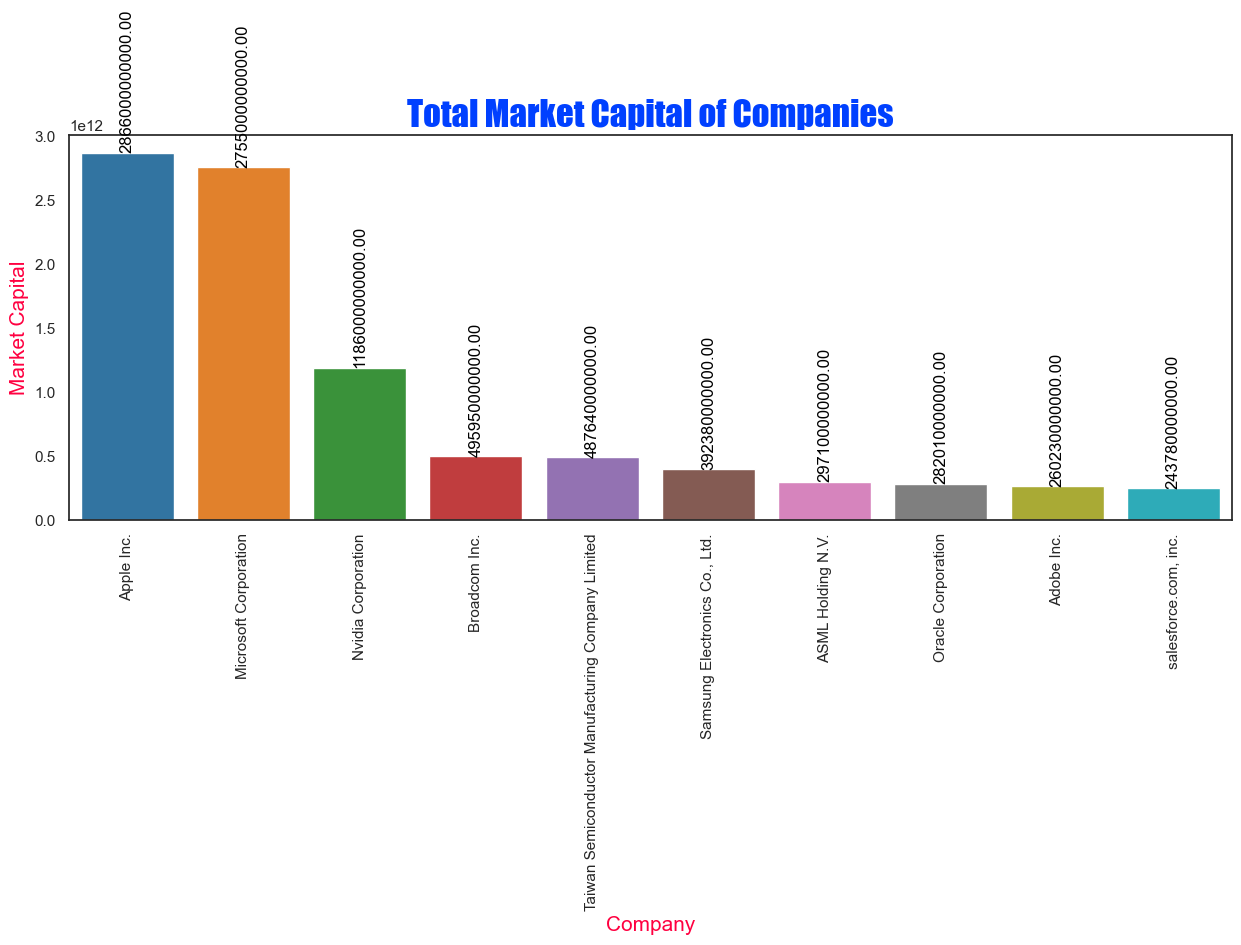

In [166]:
Market_Cap1 = df.groupby(['Company'], as_index=False)['Market Cap'].sum().sort_values(by='Market Cap', ascending=False).head(10)

# Set figure size first
sb.set(rc={'figure.figsize': (15, 5)})
sb.set_style('white')

# Create the bar plot
ax = sb.barplot(x='Company', y='Market Cap', data=Market_Cap1, palette='tab10')

# Adding text annotations for each bar
for index, value in enumerate(Market_Cap1['Market Cap']):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black', rotation=90)

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Company', fontdict=font2)  # x-axis label
plt.ylabel('Market Capital', fontdict=font2)  # y-axis label
plt.title('Total Market Capital of Companies', fontdict=font1)

plt.xticks(rotation=90)

# Using tight_layout to adjust subplots parameters
plt.tight_layout()

# Show the plot
plt.show()

### Insight 4: "Apple Inc." followed by " Microsoft Corporation" and "Nvidia Corporation" companies have the highest Market Capital.

# 5. What is the count of companies by Country and Sector?

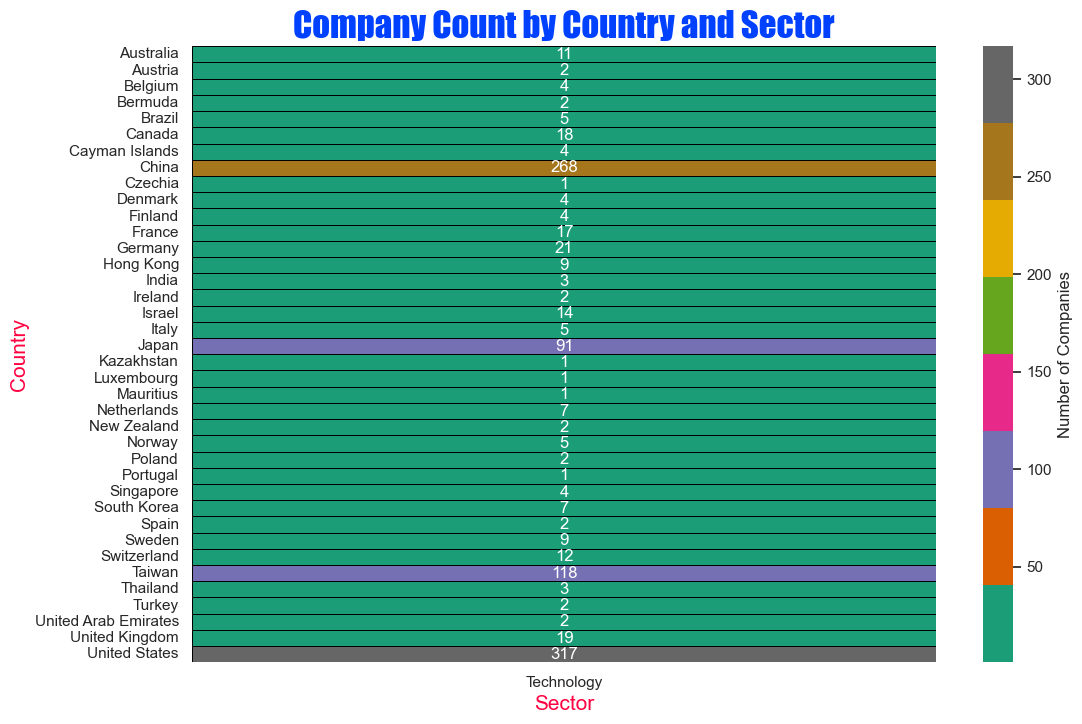

In [171]:
# Create a pivot table
company_count_matrix = df.pivot_table(index='Country', columns='Sector', values='Company', aggfunc='count')

# Increase the figure size for better readability
plt.figure(figsize=(12, 8))  # Adjusted size for better clarity

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Plot a heatmap with increased bar height for inner bars
sb.heatmap(data=company_count_matrix, cmap='Dark2', linewidths=0.7, annot=True, fmt='d', linecolor='black',
            cbar_kws={'label': 'Number of Companies'},
            annot_kws={"size": 12})  # Increased font size for annotations

plt.title('Company Count by Country and Sector', fontdict=font1)  # Increased title font size
plt.xlabel('Sector', fontdict=font2)  # Adding x-label for clarity
plt.ylabel('Country', fontdict=font2)  # Adding y-label for clarity
plt.show()

### Insight 5: United States(317) has the highest number of companies in the Technology Sector  followed by China(268), then Taiwan(118) and Japan(91).

# 6. What is the sum of Market Capital by Country and Sector?

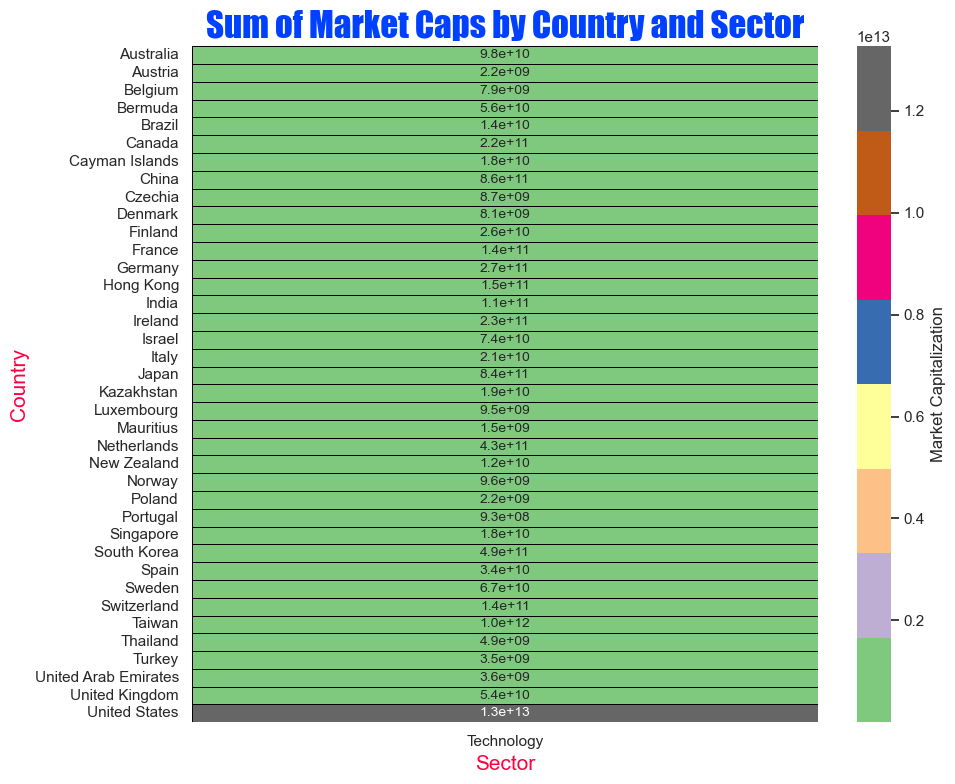

In [168]:
pivot_matrix = df.pivot_table(index='Country', columns='Sector', values='Market Cap', aggfunc='sum')

plt.figure(figsize=(10, 8))  # Increased height
sb.heatmap(data=pivot_matrix, cmap='Accent',linecolor='black', linewidths=0.7,annot=True, fmt='.1e', 
            annot_kws={"size": 10},  # Increased font size for annotations
            cbar_kws={'label': 'Market Capitalization'})

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

plt.title('Sum of Market Caps by Country and Sector', fontdict=font1)  
plt.xlabel('Sector', fontdict=font2)  # Add label for x-axis
plt.ylabel('Country', fontdict=font2)  # Add label for y-axis
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

### Insight 6: United States(1.3e+13) has the highest sum of Market Capitalization in Technology Sector followed by Taiwan(1.0e+12), then China(8.6e+11) and Japan(8.4e+11)¶

# Conclusion

### The Software-Application industry emerged as the most prevalent, holding the highest number of companies within this space in the Technology sector. Notably, Ireland stands out with the highest average market capitalization at approximately 114.39 billion, signaling its robust positioning in the market. 

### When examining industry performance, the Consumer Electronics sector leads in average market capital, closely followed by Software-Infrastructure and Semiconductors, reflecting growing consumer and enterprise demand in these areas.

### In terms of individual companies, Apple Inc. ranks first in market capitalization, with Microsoft Corporation and Nvidia Corporation trailing closely behind, highlighting their dominance in the sector. 

### Geographically, the United States boasts the highest number of technology companies, totaling 317, with China, Taiwan, and Japan following. 

### Furthermore, the U.S. leads in total market capitalization in the Technology sector at approximately $13 trillion, significantly outweighing Taiwan, China, and Japan, which collectively show strong activity but remain behind. 

### These insights can guide strategic decisions for stakeholders looking to navigate the technology landscape effectively.